In [0]:
#Dataset is in the google drive

# Connecting with Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount = False)

# setting a root_dir and base_dir
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

In [0]:
#updating fastai library
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [0]:
path = Path(base_dir + 'Indian-Currency-Dataset/')

#path to the train folder in the dataset
path_train = Path(base_dir + 'Indian-Currency-Dataset/train-cropped')

# path to the test folder
path_test = Path(base_dir + 'Indian-Currency-Dataset/test-cropped')

In [0]:
path_test.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset/test-cropped/none'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset/test-cropped/10'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset/test-cropped/5'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset/test-cropped/20'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset/test-cropped/200'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset/test-cropped/50'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset/test-cropped/100'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset/test-cropped/500'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset/test-cropped/2000')]

## View data

In [0]:
no_of_none_image = len((path_train/"none").ls())
no_of_5_image = len((path_train/"5").ls())
no_of_10_image = len((path_train/"10").ls())
no_of_20_image = len((path_train/"20").ls())
no_of_50_image = len((path_train/"50").ls())
no_of_100_image = len((path_train/"100").ls())
no_of_200_image = len((path_train/"200").ls())
no_of_500_image = len((path_train/"500").ls())
no_of_2000_image = len((path_train/"2000").ls())

In [0]:
print(f"No. of 'None' image is {no_of_none_image}")
print(f"No. of '5' image is {no_of_5_image}")
print(f"No. of '10' image is {no_of_10_image}")
print(f"No. of '20' image is {no_of_20_image}")
print(f"No. of '50' image is {no_of_50_image}")
print(f"No. of '100' image is {no_of_100_image}")
print(f"No. of '200' image is {no_of_200_image}")
print(f"No. of '500' image is {no_of_500_image}")
print(f"No. of '2000' image is {no_of_2000_image}")

No. of 'None' image is 535
No. of '5' image is 566
No. of '10' image is 581
No. of '20' image is 523
No. of '50' image is 502
No. of '100' image is 536
No. of '200' image is 554
No. of '500' image is 522
No. of '2000' image is 88


In [0]:
no_of_none_test_image = len((path_test/"none").ls())
no_of_5_test_image = len((path_test/"5").ls())
no_of_10_test_image = len((path_test/"10").ls())
no_of_20_test_image = len((path_test/"20").ls())
no_of_50_test_image = len((path_test/"50").ls())
no_of_100_test_image = len((path_test/"100").ls())
no_of_200_test_image = len((path_test/"200").ls())
no_of_500_test_image = len((path_test/"500").ls())
no_of_2000_test_image = len((path_test/"2000").ls())

In [0]:
print(f"No. of 'None' image is {no_of_none_test_image}")
print(f"No. of '5' image is {no_of_5_test_image}")
print(f"No. of '10' image is {no_of_10_test_image}")
print(f"No. of '20' image is {no_of_20_test_image}")
print(f"No. of '50' image is {no_of_50_test_image}")
print(f"No. of '100' image is {no_of_100_test_image}")
print(f"No. of '200' image is {no_of_200_test_image}")
print(f"No. of '500' image is {no_of_500_test_image}")
print(f"No. of '2000' image is {no_of_2000_test_image}")

No. of 'None' image is 29
No. of '5' image is 24
No. of '10' image is 57
No. of '20' image is 10
No. of '50' image is 42
No. of '100' image is 62
No. of '200' image is 43
No. of '500' image is 22
No. of '2000' image is 5


In [0]:
tfms = get_transforms(do_flip = False, max_rotate = 180.0)

In [0]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [0]:
#Creating a ImageDataBunch object, it bundles training images, validation images, and testing images all in one object.
# Also, "size=224" will make all images of same size (3, 224, 224).
# "valid_pct = 0.2" will split training data into training and vaid data with 80, 20 propotion.
#normalize(imagenet_stats) will normalize images

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train="train-cropped", valid = 'valid-cropped', test = 'test-cropped',
          ds_tfms = tfms, bs = 16, size = 448, num_workers=2).normalize(imagenet_stats)

data

ImageDataBunch;

Train: LabelList (4407 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
none,none,none,none,none
Path: /content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset;

Valid: LabelList (871 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
none,none,none,none,none
Path: /content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset;

Test: LabelList (294 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: EmptyLabelList
,,,,
Path: /content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset

In [0]:
 #I have randomly dowloaded and added some images for "none" class.
 
#  data.show_batch(rows=9, figsize=(20,20))

## Train model

In [0]:
# Creating a "CNN" learner object with "ResNet34" architecture
# metrics =error_rate, will show error rate during training.

learn = cnn_learner(data, models.resnet50, metrics = accuracy)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.733782,0.362079,0.894374,05:05
1,0.350646,0.132752,0.962112,04:46
2,0.196458,0.082055,0.977038,04:38
3,0.151050,0.061925,0.982778,04:42


In [0]:
learn.save('stage-1-new')

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.177112,0.084387,0.970149,04:36
1,0.185267,0.063525,0.983927,04:42
2,0.110763,0.052253,0.986223,04:37
3,0.091967,0.040483,0.987371,04:42


In [0]:
learn.save('stage-2-new')

In [0]:
learn.load('stage-2-448-Tr-R50');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


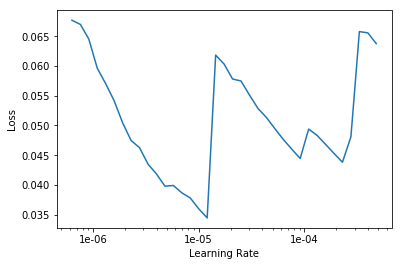

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8, max_lr = slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.056799,0.057503,0.985866,01:15
1,0.042510,0.059022,0.989399,01:17
2,0.036339,0.062904,0.989399,01:15
3,0.035647,0.065214,0.985866,01:14
4,0.027062,0.076518,0.982332,01:14
5,0.027746,0.077615,0.985866,01:14
6,0.030297,0.071348,0.985866,01:13
7,0.030119,0.071502,0.978799,01:12


In [0]:
learn.save('stage-3-448-Tr-R50')

In [0]:
learn.load('stage-3-448-Tr-R50');

In [0]:
learn.freeze()

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.032155,0.109283,0.971731,01:14
1,0.067627,0.085930,0.982332,01:09
2,0.071204,0.085563,0.982332,01:09
3,0.062149,0.085272,0.982332,01:08


In [0]:
learn.save('stage-4-448-Tr-R50')

In [0]:
learn.load('stage-4-448-Tr-R50');

In [0]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,time
0,0.036122,0.083847,0.982332,01:14
1,0.036608,0.086661,0.982332,01:11
2,0.029709,0.088202,0.982332,01:10
3,0.032351,0.113748,0.978799,01:08
4,0.043093,0.095566,0.982332,01:09
5,0.049142,0.082719,0.985866,01:10
6,0.063975,0.089981,0.985866,01:10
7,0.064817,0.065674,0.992933,01:10
8,0.052843,0.077675,0.992933,01:10
9,0.036786,0.075831,0.985866,01:13


In [0]:
learn.save('stage-5-448-Tr-R50')

## Interpretation

In [0]:
# Using "stage-1" weights for inference
learn.load('stage-1-new');

In [0]:
# path_data = '/content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset/'

In [0]:
data_test = ImageDataBunch.from_folder(path, train="train-cropped", valid = 'test-cropped',
          ds_tfms = ([], []), bs = 16, size = 448, num_workers=4).normalize(imagenet_stats)
data_test

ImageDataBunch;

Train: LabelList (4407 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
none,none,none,none,none
Path: /content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset;

Valid: LabelList (294 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
none,none,none,none,none
Path: /content/gdrive/My Drive/fastai-v3/Indian-Currency-Dataset;

Test: None

In [0]:
# data_test = ImageDataBunch.from_folder(path_data, valid = 'test', ds_tfms=([], []),
#                                        size=448, num_workers=4).normalize(imagenet_stats)
# data_test

In [0]:
learn.data = data_test

In [0]:
# "interp" object will help analysing the trained model
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
#This shows, the objects which model most confused with.
interp.most_confused()

[('10', 'none', 16),
 ('100', 'none', 16),
 ('100', '50', 13),
 ('100', '500', 7),
 ('none', '200', 5),
 ('100', '200', 4),
 ('none', '100', 4),
 ('none', '20', 4),
 ('10', '100', 3),
 ('10', '5', 3),
 ('10', '50', 3),
 ('50', '5', 3),
 ('200', 'none', 2),
 ('500', '50', 2),
 ('none', '10', 2),
 ('10', '20', 1),
 ('10', '200', 1),
 ('100', '10', 1),
 ('100', '5', 1),
 ('20', '10', 1),
 ('200', '500', 1),
 ('5', 'none', 1),
 ('500', '10', 1),
 ('none', '50', 1)]

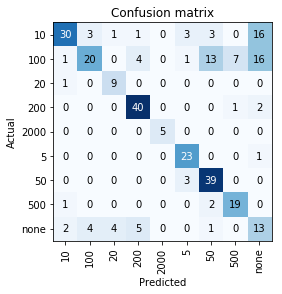

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.plot_top_losses(183, heatmap = False, figsize=(40, 24))

Output hidden; open in https://colab.research.google.com to view.

In [0]:
 #Exporting the trained model...
learn.export()